# Complete regression Example using Housing Prices

__The Machine learning workflow__:
Remember, as data scientists we want a consistent process to getting great results. That’s where the machine learning workflow comes in.
There are five core steps:
    -__Exploratory Analysis__ – First, “get to know” the data. This step should be quick, efficient, and decisive.
    -__Data Cleaning__ – Then, clean your data to avoid many common pitfalls. Better data beats fancier algorithms.
    -__Feature Engineering__ – Next, help your algorithms “focus” on what’s important by creating new features.
    -__Algorithm Selection__ – Choose the best, most appropriate algorithms without wasting your time.
    -__Model Training__ – Finally, train your models. This step is pretty formulaic once you’ve done the first four.

## Exploratory Analysis

Why perform exploratory analysis upfront?

The purpose of exploratory analysis is to “get to know” the dataset. Doing so upfront will make the rest of the project much smoother, in 3 main ways:

You’ll gain valuable hints for Data Cleaning (which can make or break your models).
You’ll think of ideas for Feature Engineering (which can take your models from good to great).
You’ll get a “feel” for the dataset, which will help you communicate results and deliver greater impact.

However, exploratory analysis for machine learning should be quick, efficient, and decisive… not long and drawn out! Don’t skip this step, but don’t get stuck on it either.

You see, there are infinite possible plots, charts, and tables, but you only need a handful to “get to know” the data well enough to work with it. In this guide, we’ll show you the visualizations that provide the biggest bang for your buck.
Start with Basics

First, you’ll want to answer a set of basic questions about the dataset:

How many observations do I have?
How many features?
What are the data types of my features? Are they numeric? Categorical?
Do I have a target variable?

In [1]:
# Loading packages
import pandas as pd

In [2]:
#Import data
df = pd.read_csv(r"C:\Users\jg\code\templat_reg_and_class\data\housing_train_reg_uni.csv")
print(df.head())
print("Dim of data:", df.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
#Cutting down the number of features for this project
col = ["Id", "MSSubClass", "MSZoning", "LotArea", "LotConfig", "BldgType", "OverallCond", "YearBuilt", "YearRemodAdd", "Exterior1st", "BsmtFinType2", "TotalBsmtSF"]
df = df[col + ["SalePrice"]]
print(df.head())
print("Dim of data:", df.shape)

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   1          60       RL     8450    Inside     1Fam            5   
1   2          20       RL     9600       FR2     1Fam            8   
2   3          60       RL    11250    Inside     1Fam            5   
3   4          70       RL     9550    Corner     1Fam            5   
4   5          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st BsmtFinType2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd          Unf          856     208500  
1       1976          1976     MetalSd          Unf         1262     181500  
2       2001          2002     VinylSd          Unf          920     223500  
3       1915          1970     Wd Sdng          Unf          756     140000  
4       2000          2000     VinylSd          Unf         1145     250000  
Dim of data: (1460, 13)


There are 1460 observations and 13 features. The features are:

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotArea: Lot size in square feet
- LotConfig: Lot configuration
- BldgType: Type of dwelling
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- Exterior1st: Exterior covering on house
- BsmtFinType2: Quality of second finished area (if present), basement
- TotalBsmtSF: Total square feet of basement area
- Id

Shape: (1460, 13)
-----------------
Id --> Type:num | Nas: 0(0%) | Min-Max: (1)-(1460) | Possible PK
MSSubClass --> Type:cat | Nas: 0(0%) | Categories: 15
MSZoning --> Type:cat | Nas: 0(0%) | Categories: 5
LotArea --> Type:num | Nas: 0(0%) | Min-Max: (1300)-(215245)
LotConfig --> Type:cat | Nas: 0(0%) | Categories: 5
BldgType --> Type:cat | Nas: 0(0%) | Categories: 5
OverallCond --> Type:cat | Nas: 0(0%) | Categories: 9
YearBuilt --> Type:num | Nas: 0(0%) | Min-Max: (1872)-(2010)
YearRemodAdd --> Type:num | Nas: 0(0%) | Min-Max: (1950)-(2010)
Exterior1st --> Type:cat | Nas: 0(0%) | Categories: 15
BsmtFinType2 --> Type:cat | Nas: 38(2%) | Categories: 6
TotalBsmtSF --> Type:num | Nas: 0(0%) | Min-Max: (0)-(6110)
SalePrice --> Type:num | Nas: 0(0%) | Min-Max: (34900)-(755000)


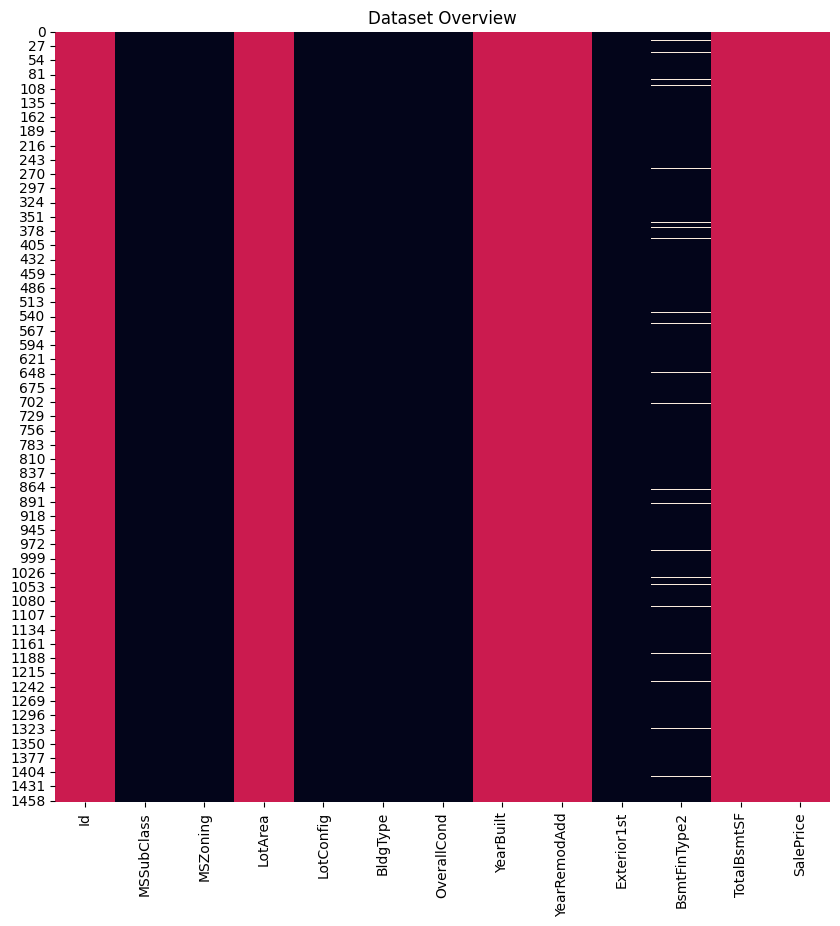

 Categerocial   Numerical/DateTime   NaN 


In [5]:
#Using function to find nans and num and catergorical variables in df
from functions import dtf_overview
dtf_overview(df, figsize=(10,10))

In [6]:
#Set Id as index and SalePrice to Y
df = df.set_index("Id")
df = df.rename(columns={"SalePrice":"Y"})
df.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinType2,TotalBsmtSF,Y
Id,,,,,,,,,,,,
1,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,Unf,856,208500
2,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,Unf,1262,181500
3,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,Unf,920,223500
4,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,Unf,756,140000
5,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,Unf,1145,250000


array([[<AxesSubplot: title={'center': 'MSSubClass'}>,
        <AxesSubplot: title={'center': 'LotArea'}>,
        <AxesSubplot: title={'center': 'OverallCond'}>],
       [<AxesSubplot: title={'center': 'YearBuilt'}>,
        <AxesSubplot: title={'center': 'YearRemodAdd'}>,
        <AxesSubplot: title={'center': 'TotalBsmtSF'}>],
       [<AxesSubplot: title={'center': 'Y'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

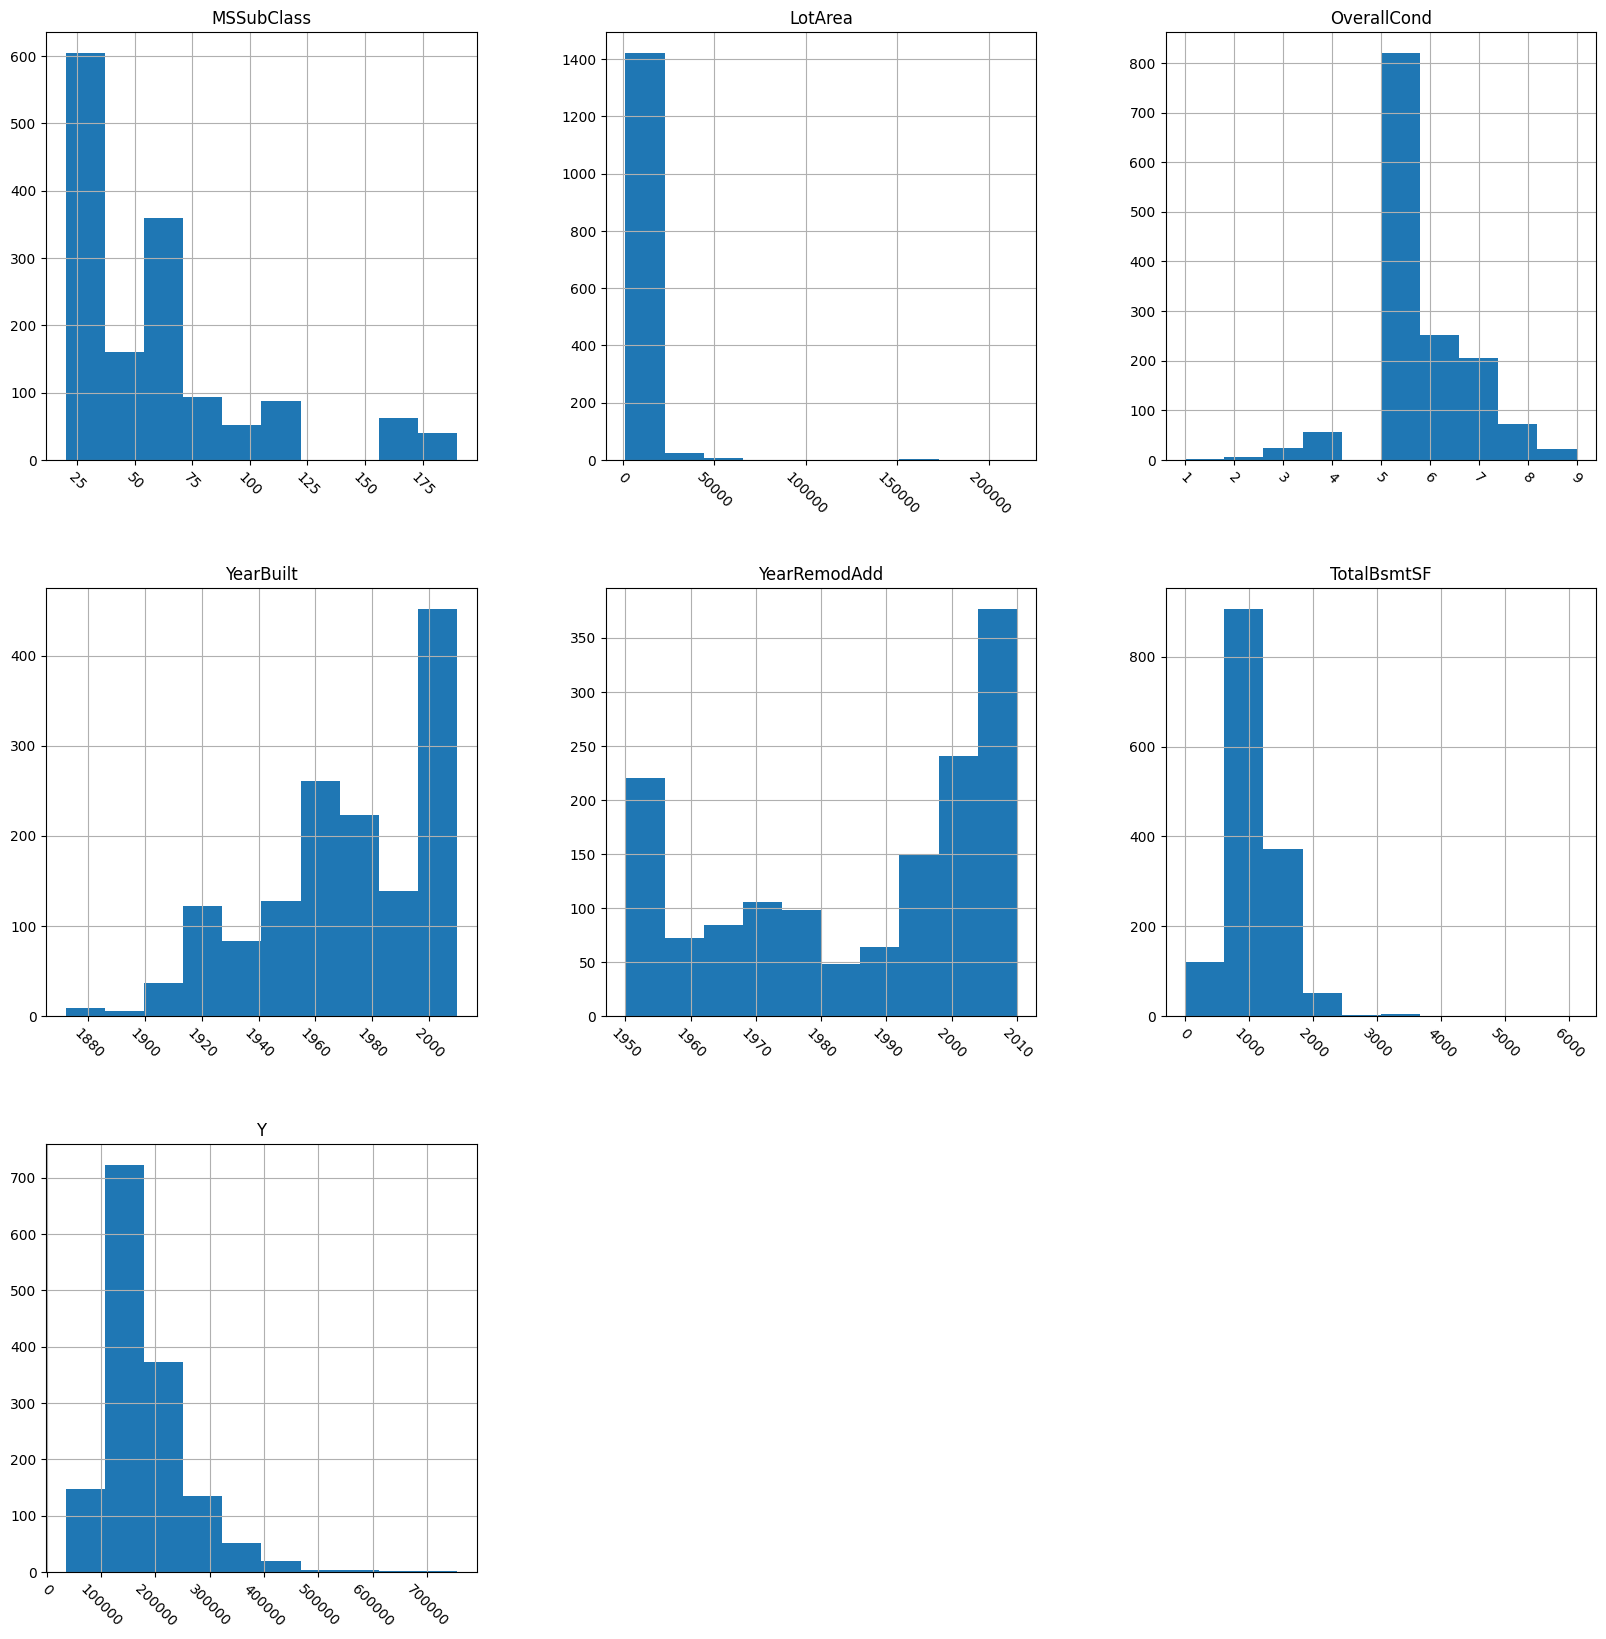

In [7]:
#Make histogram of num variabels
df.hist(figsize=(20,20), xrot=-45)

Here are a few things to look out for in a histogram:
    - Distributions that are unexpected
    - Potential outliers that don’t make sense
    - Features that should be binary (i.e. “wannabe indicator variables”)
    - Boundaries that don’t make sense
    - Potential measurement errors

Q1 quantile of Y :  129975.0
Q2 quantile (median) of Y:  163000.0
Q3 quantile of Y :  214000.0


C:\Users\jg\code\templat_reg_and_class\code\functions.py:116: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade":True}, ax=ax[0])
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\seaborn\distributions.py:2517: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


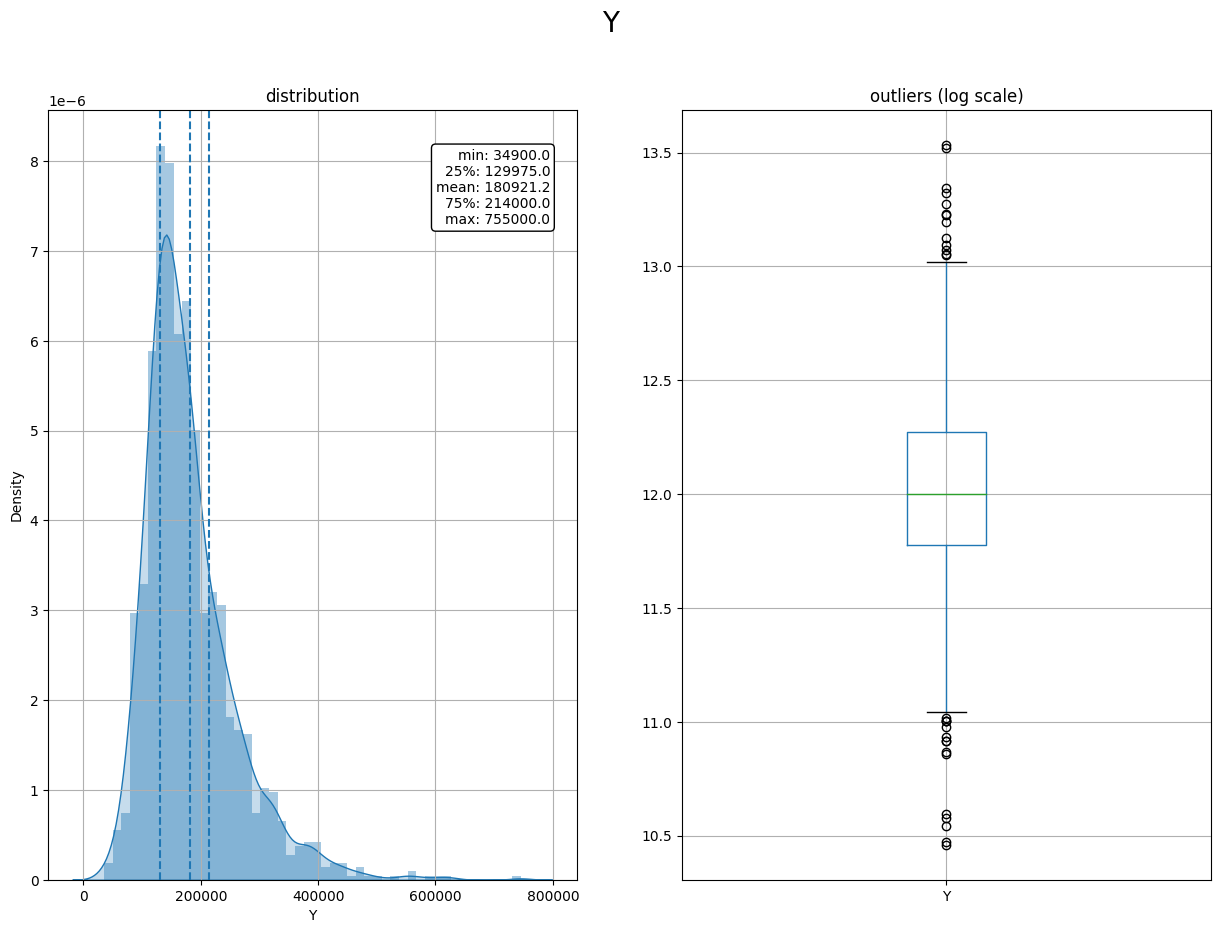

In [8]:
#Get the distribution of SalePrice
%load_ext autoreload
from functions import freqdist_plot
%autoreload 2
freqdist_plot(dtf = df, x = "Y", box_logscale=True, figsize=(15,10), quantile_breaks=(0,10))

MSZoning        object
LotConfig       object
BldgType        object
Exterior1st     object
BsmtFinType2    object
dtype: object


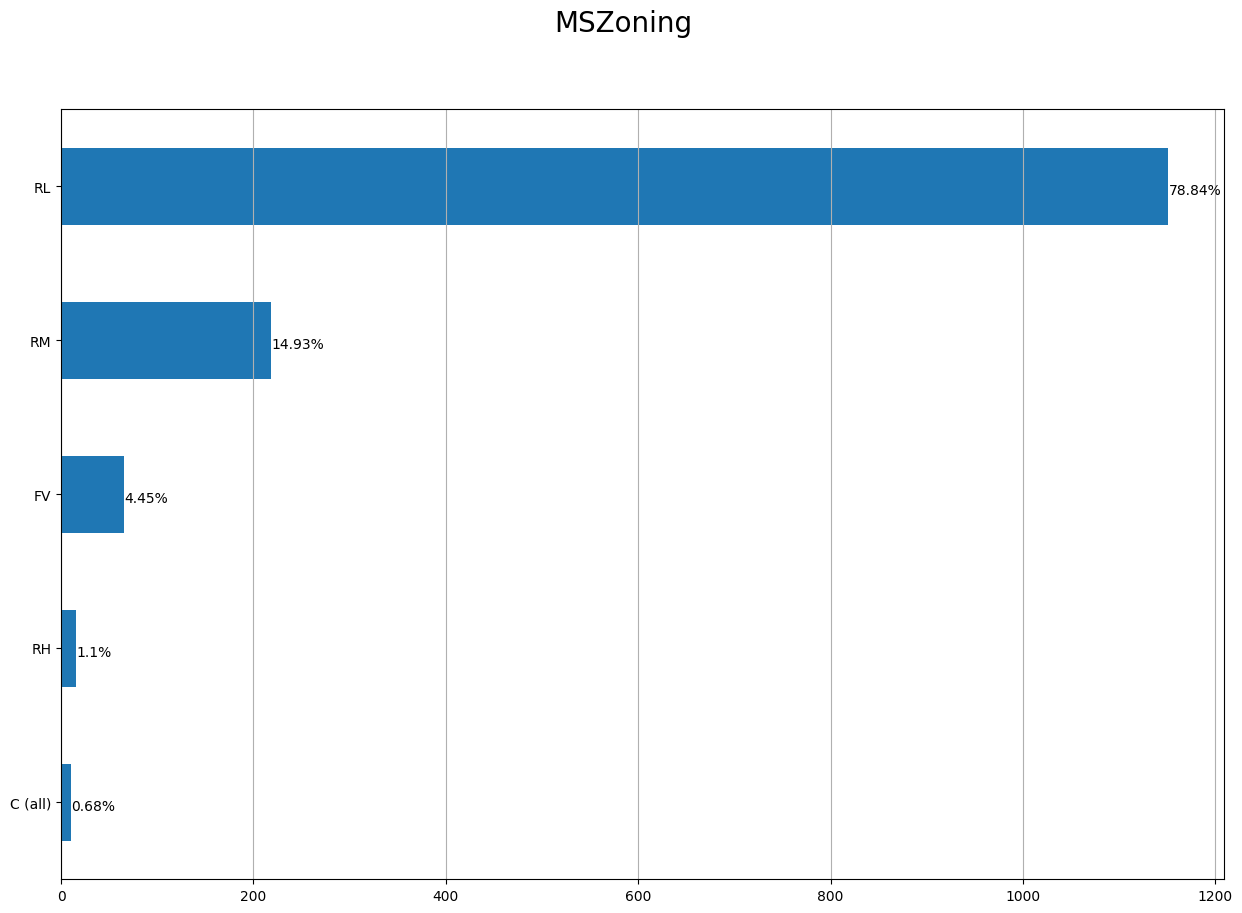

In [9]:
#Plotting categorical variables
print(df.dtypes[df.dtypes=="object"])
freqdist_plot(df, "MSZoning", figsize=(15,10))

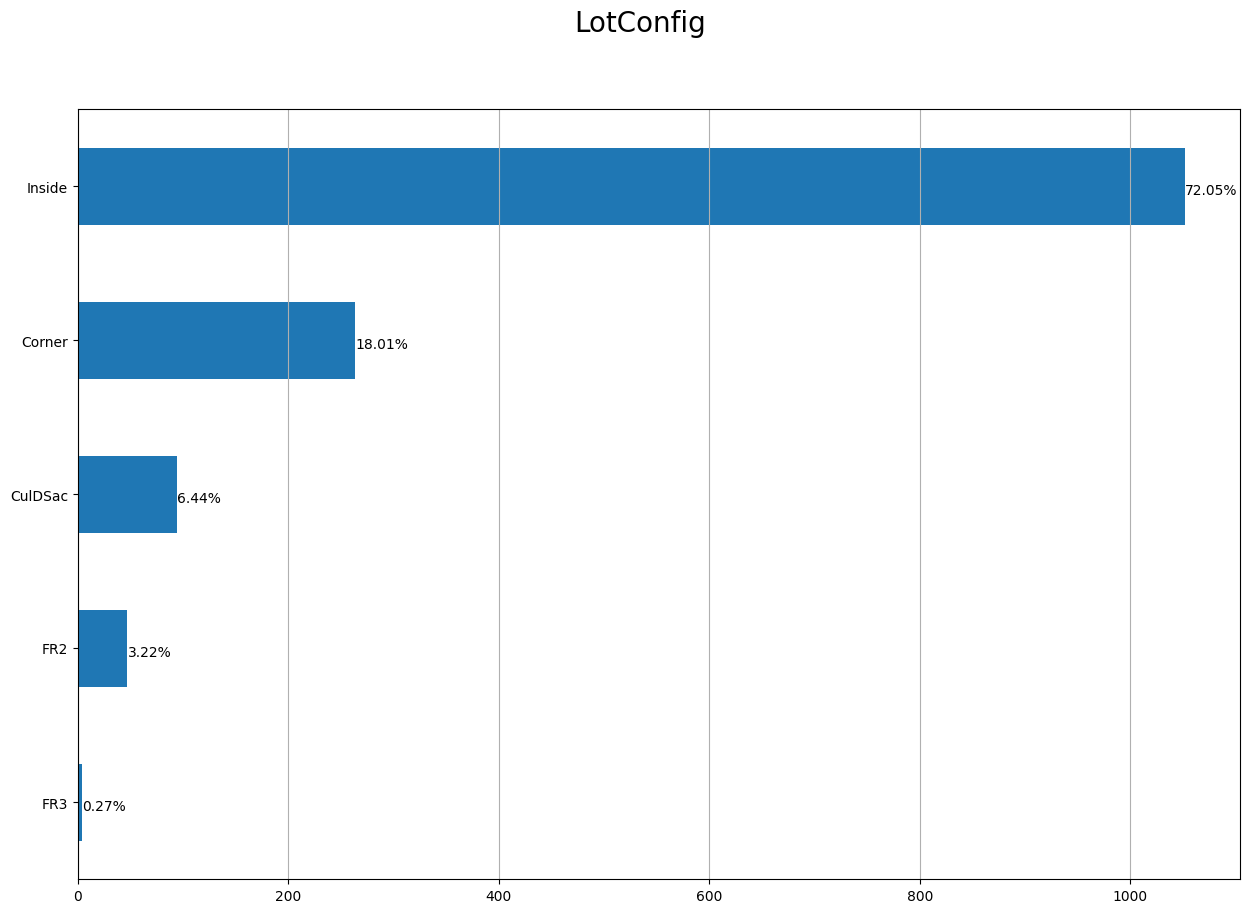

In [10]:
freqdist_plot(df, "LotConfig", figsize=(15,10))

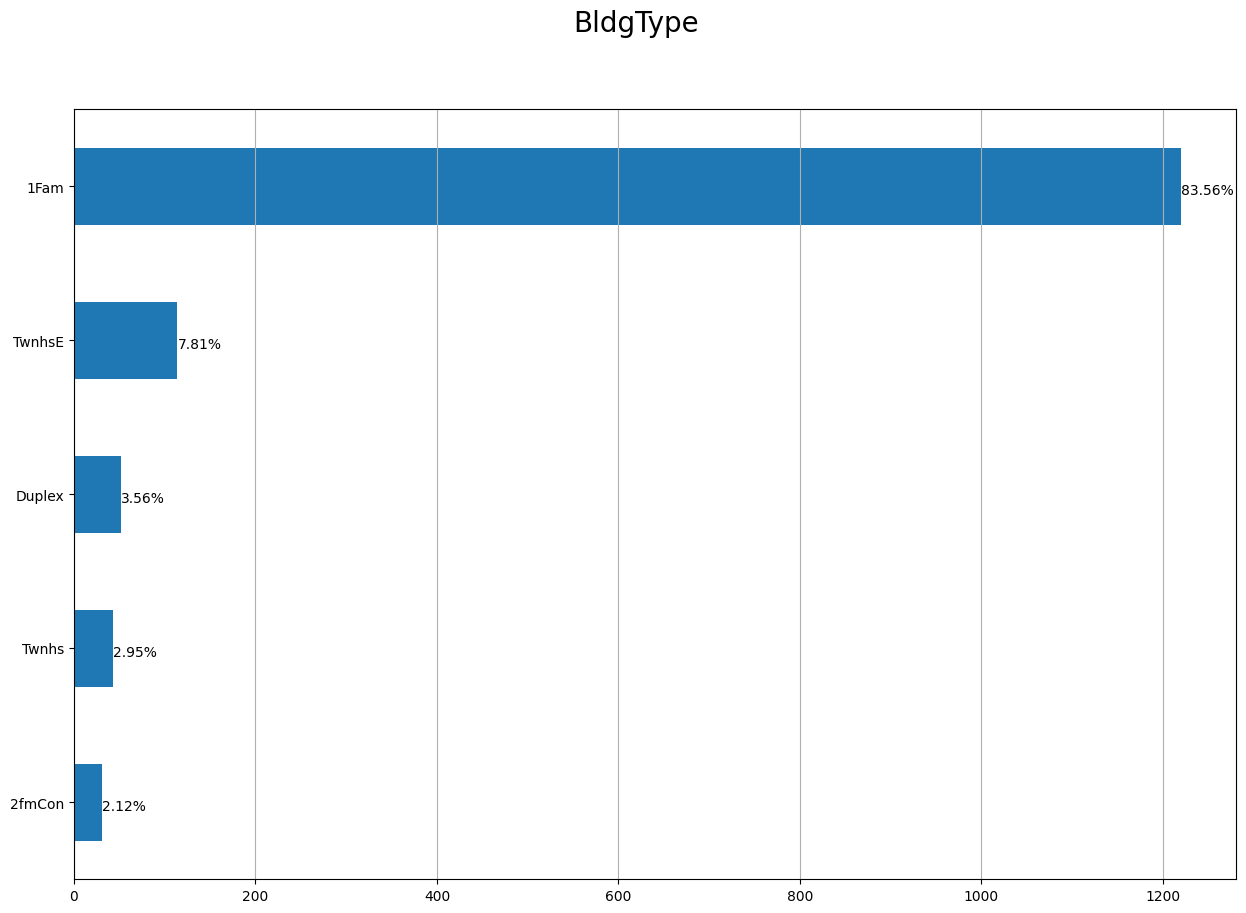

In [11]:
freqdist_plot(df, "BldgType", figsize=(15,10))

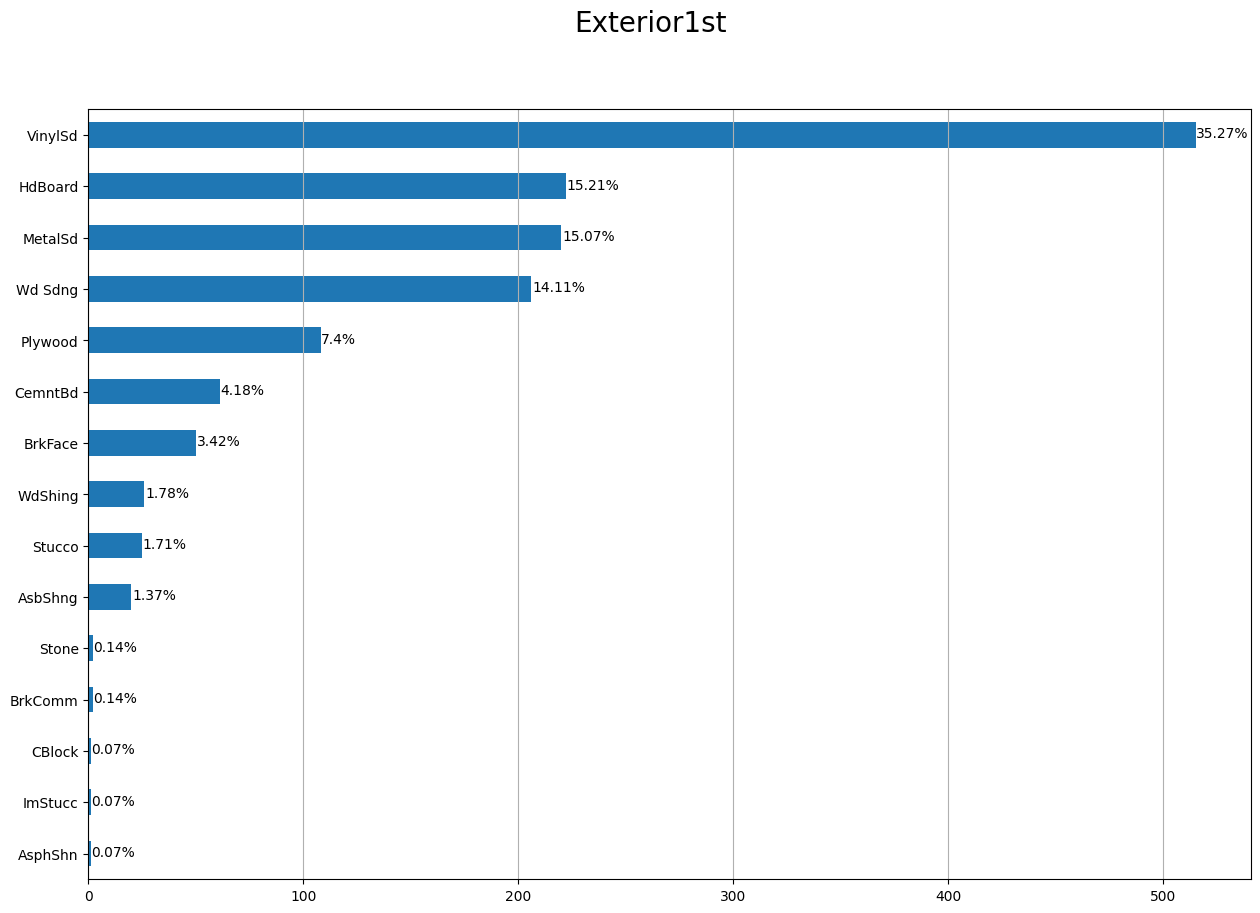

In [12]:
freqdist_plot(df, "Exterior1st", figsize=(15,10))

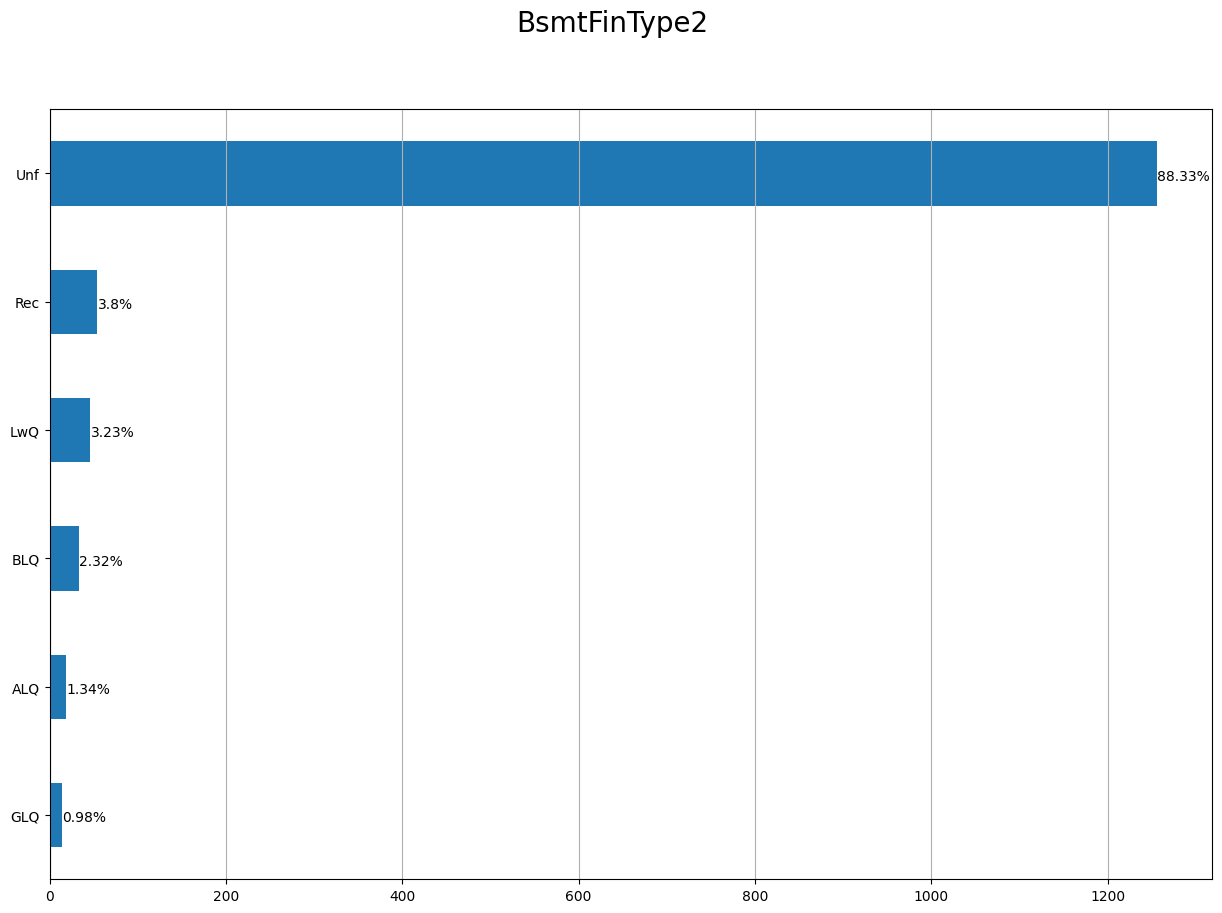

In [13]:
freqdist_plot(df, "BsmtFinType2", figsize=(15,10))

Anyway, back to sparse classes… as you can see, some of the classes for ‘exterior_walls’ have very short bars. Those are sparse classes.

They tend to be problematic when building models.

In the best case, they don’t influence the model much.
In the worse case, they can cause the model to be overfit.

Therefore, we recommend making a note to combine or reassign some of these classes later. We prefer saving this until Feature Engineering.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- WARNING: Factorizing 5 labels of MSZoning ---
--- WARNING: Factorizing 5 labels of LotConfig ---
--- WARNING: Factorizing 5 labels of BldgType ---
--- WARNING: Factorizing 15 labels of Exterior1st ---
--- WARNING: Factorizing 6 labels of BsmtFinType2 ---


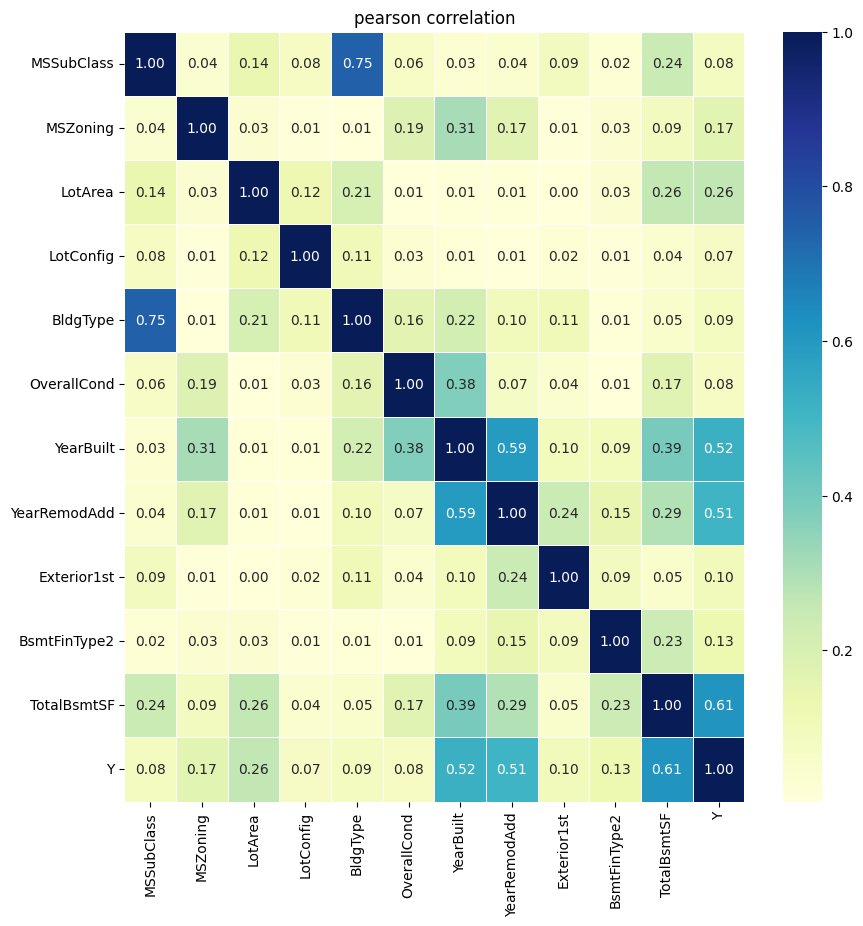

In [88]:
#Finding correlation with num var and Y
%load_ext autoreload
from functions import corr_matrix
%autoreload 2
corr = corr_matrix(df, method="pearson", negative=False, figsize=(10,10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has

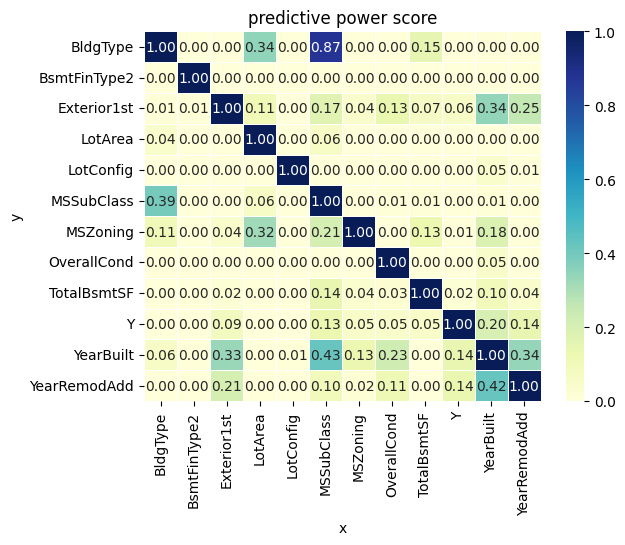

In [91]:
#Finding predictiv score between num and Y
%load_ext autoreload
from functions import pps_matrix
%autoreload 2
pps = pps_matrix(dtf = df, figsize=(15,15))